**FINAL PROJECT: EMTECH 2**


Name: Pamela V. Malazarte


Intended Learning Outcomes (ILOs):

Demonstrate how to train and save a model.

Demonstrate how to deploy the deep learning model in the cloud. (not Machine Learning model)


Instructions:

You can choose any previous deep learning model.

Follow the instructions on deploying a model using Streamlit App in the cloud.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/emtech final project/archive.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")


In [10]:
!ls /content/dataset


cat_dog  cat_dog.csv


In [12]:
import pandas as pd

df = pd.read_csv("/content/data/cat_dog.csv")  # use exact name from ls
df.head()


,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1


In [14]:
import pandas as pd
import os

# Load CSV
df = pd.read_csv("/content/data/cat_dog.csv")

# Add full image paths
image_dir = "/content/data/images"  # <-- adjust if your images are elsewhere
df["image_path"] = df["image"].apply(lambda x: os.path.join(image_dir, x))
import pandas as pd
import os

# Load CSV
df = pd.read_csv("/content/data/cat_dog.csv")

# Add full image paths
image_dir = "/content/data/images"  # <-- adjust if your images are elsewhere
df["image_path"] = df["image"].apply(lambda x: os.path.join(image_dir, x))


In [17]:
import pandas as pd
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# Step 1: Load CSV and build image paths
df = pd.read_csv("/content/data/cat_dog.csv")
image_dir = "/content/data/cat_dog"
df["image_path"] = df["image"].apply(lambda x: os.path.join(image_dir, x))

# Step 2: Load and preprocess images
images = []
labels = []

for i, row in df.iterrows():
    path = row["image_path"]
    if not os.path.exists(path):
        print(f"❌ Missing: {path}")
        continue
    img = Image.open(path).resize((64, 64)).convert("RGB")
    img_array = np.array(img) / 255.0
    images.append(img_array)
    labels.append(row["labels"])

X = np.array(images)
y = to_categorical(np.array(labels))

# Step 3: Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(y.shape[1], activation='softmax')
])

# Step 5: Compile and train
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

# Step 6: Save model
model.save("cnn_model.h5")
print("✅ CNN model saved as cnn_model.h5")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 179ms/step - accuracy: 0.6421 - loss: 0.6276 - val_accuracy: 0.7072 - val_loss: 0.5586
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 169ms/step - accuracy: 0.7680 - loss: 0.4831 - val_accuracy: 0.7740 - val_loss: 0.4754
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.8108 - loss: 0.4143 - val_accuracy: 0.7998 - val_loss: 0.4387
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 173ms/step - accuracy: 0.8436 - loss: 0.3439 - val_accuracy: 0.8018 - val_loss: 0.4425
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 170ms/step - accuracy: 0.8927 - loss: 0.2599 - val_accuracy: 0.8008 - val_loss: 0.4622
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.9374 - loss: 0.1611 - val_accuracy: 0.7894 - val_loss: 0.5827
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 170ms/step - accuracy: 0.9723 - loss: 0.0833 - val_accuracy: 0.7954 - val_loss: 0.7161
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 173ms/step - accuracy: 0.9849 -

✅ CNN model saved as cnn_model.h5


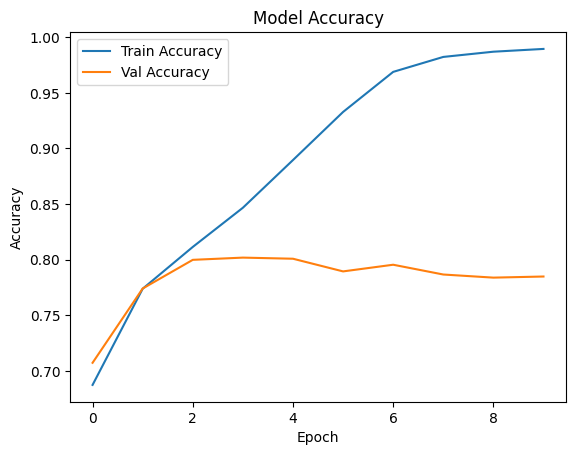

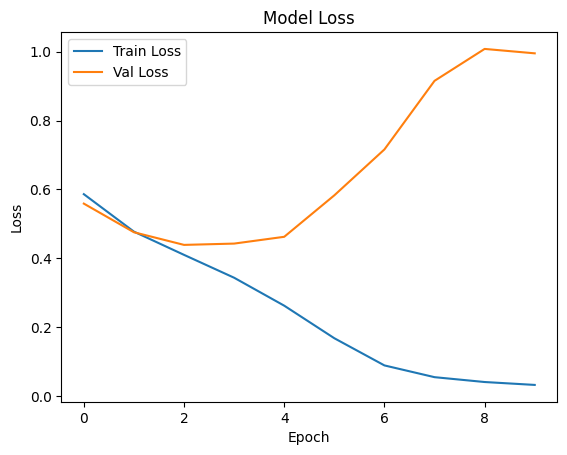

In [18]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
from tensorflow.keras.models import load_model

model = load_model("cnn_model.h5")

def predict_image(path):
    img = Image.open(path).resize((64, 64)).convert("RGB")
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 64, 64, 3)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    print(f"Predicted class: {class_index}")

# Example
predict_image("/content/data/cat_dog/cat.123.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted class: 0
